## Linear Regression Project:

##### Objective - To find an open dataset on kaggle or other website that comes with at least 2 numeric variables, at least 2 categorical variables and at least 100 observations. Then choose one variable as the outcome response (numeric or binary), perform a regression analysis using the data, then discuss the results.

- Here I am using dataset from kaggle where the response variable is insurance cost incurred by the patients. The dataset has 7 columns including the response variable. The other 6 columns are used in analyzing the response variable i.e ‘charges’.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy
from scipy import stats

In [7]:
df = pd.read_csv("/insurance.csv")
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:

df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Performing Initial EDA
- Checking null values in columns
- Finding the causal relationship between insurance charges and other predictor variables
- Checking the correlation using heat map
- Cheking for Multicollinearity (Here VIF - VARIANCE INFLATION FACTOR is used)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.isnull().sum()
# there is no null value in the dataframe

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

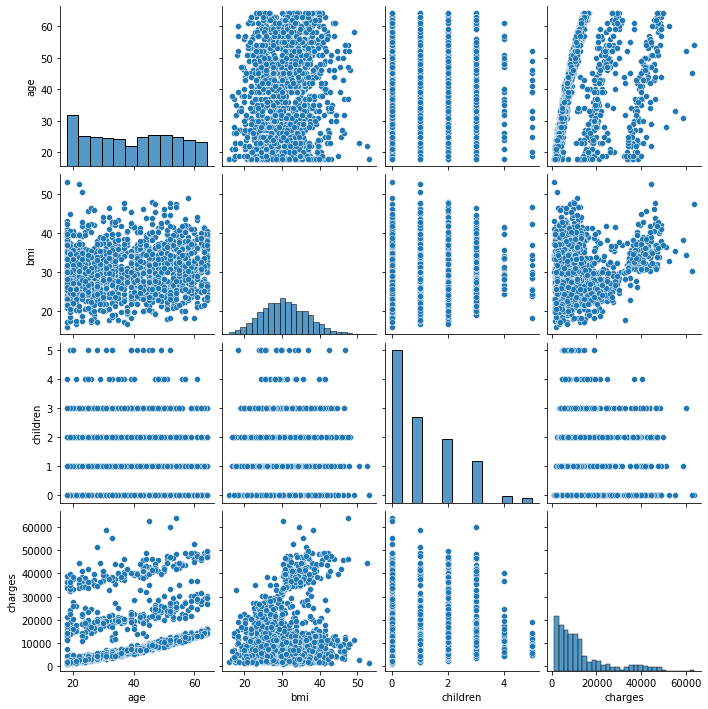

In [11]:
## plots to get an initial sense of each predictor variable and its potential relationship to the insurance charges.
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


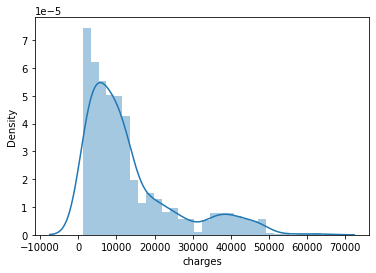

In [12]:
sns.distplot(df['charges'])

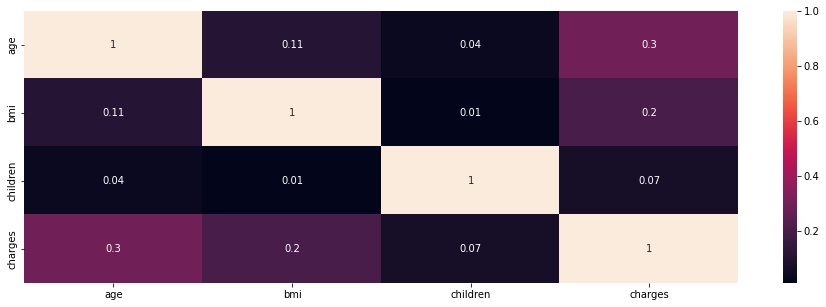

In [13]:
## correlation heatmap
corr_matrix = df.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data = corr_matrix, annot = True)

In [14]:
# Check for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('charges~age+sex+bmi+children+smoker+region', data=df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,35.527488,Intercept
1,1.008900,sex[T.male]
2,1.012074,smoker[T.yes]
3,1.518823,region[T.northwest]
4,1.652230,region[T.southeast]
5,1.529411,region[T.southwest]
6,1.016822,age
7,1.106630,bmi
8,1.004011,children


There seems no significant multicollinearity between the variables

### Model Diagnostics:

Initially to diagnose a full model was fit using all the predictors present in the dataset

In [15]:
# full model
model_full = smf.ols('charges~age+sex+bmi+children+smoker+region' , df ).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        03:51:46   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
sex[T.male]          -131.3144    332.945     -0.394      0.693    -784.470     521.842
smoker[T.yes]        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region[T.northwest]  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region[T.southeast] -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region[T.southwest]  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
age                   256.8564     11.899     21.587      0.000     233.514     280.199
bmi                   339.1935     28.599     11.860      0.000     283.088     395.298
children              475.5005    137.804      3.451      0.001     205.163     745.838
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With a significance level of 0.05,decided to drop the feature Sex which has a p-value of 0.693. Model diagnostic with rest of the features was continued

In [16]:
# Drop sex as the it is not significant in the full model
model_v1 = smf.ols('charges~age+bmi+children+smoker+region' , df ).fit()
model_v1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        03:51:49   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.199e+04    978.762    -12.250      0.000   -1.39e+04   -1.01e+04
smoker[T.yes]        2.384e+04    411.856     57.875      0.000     2.3e+04    2.46e+04
region[T.northwest]  -352.1821    476.120     -0.740      0.460   -1286.211     581.847
region[T.southeast] -1034.3601    478.537     -2.162      0.031   -1973.130     -95.590
region[T.southwest]  -959.3747    477.778     -2.008      0.045   -1896.656     -22.094
age                   256.9736     11.891     21.610      0.000     233.646     280.301
bmi                   338.6646     28.559     11.858      0.000     282.639     394.690
children              474.5665    137.740      3.445      0.001     204.355     744.778
==============================================================================
Omnibus:                      300.735   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.516
Skew:                           1.212   Prob(JB):                    3.48e-157
Kurtosis:                       5.654   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
### MODEL Diagnostics and Transformations

y, X = dmatrices("charges~age+bmi+children+smoker+region", data=df, return_type="dataframe")
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif

,VIF,Features
0,34.901107,Intercept
1,1.006369,smoker[T.yes]
2,1.518797,region[T.northwest]
3,1.652209,region[T.southeast]
4,1.529391,region[T.southwest]
5,1.016188,age
6,1.104197,bmi
7,1.003714,children


In [18]:
# Check for influential points
infl = model_v1.get_influence()
n = model_v1.nobs
p=model_v1.df_model+1
seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)
reg_studs=infl.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud
inflsum=infl.summary_frame()
reg_cook=inflsum.cooks_d
atyp_cook = np.abs(reg_cook) >= 4/n
print(df.index[atyp_cook],"\n",reg_cook[atyp_cook])
len(df[atyp_cook & atyp_stud])

Int64Index([   3,    9,   34,   62,   69,   85,   98,   99,  102,  115,  138,
             140,  219,  235,  242,  250,  262,  266,  289,  301,  306,  321,
             340,  355,  379,  380,  387,  397,  411,  412,  429,  430,  468,
             488,  491,  494,  516,  520,  526,  539,  543,  573,  577,  583,
             587,  599,  637,  661,  688,  696,  730,  739,  754,  770,  780,
             793,  806,  819,  854,  860,  876,  896,  936,  959,  975,  980,
             987,  989,  994, 1008, 1011, 1012, 1019, 1027, 1033, 1039, 1047,
            1080, 1085, 1100, 1134, 1142, 1146, 1195, 1206, 1230, 1258, 1300,
            1306, 1307, 1317, 1328],
           dtype='int64') 
 3       0.005511
9       0.006062
34      0.010802
62      0.006422
69      0.003216
          ...   
1300    0.019607
1306    0.003047
1307    0.003431
1317    0.003697
1328    0.006741
Name: cooks_d, Length: 92, dtype: float64


60

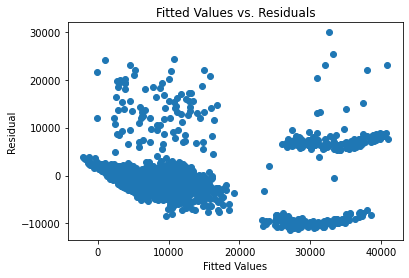

In [19]:
p = model_v1.fittedvalues
res = model_v1.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
plt.show()


Residual plots of our model also show odd clustering of data points. Due to this clustering, the fitted values and residuals also do not appear to be defined by any sort of functional relationship. This seriously throws into question if the data will meet the model assumptions of constant variance.


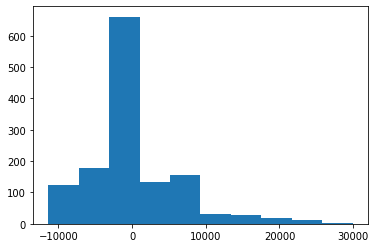

In [20]:
plt.hist(model_v1.resid)
plt.show()

##### Applying BP (Breusch Pagan) test for heteroskedasticity

In [21]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model_v1.resid, model_v1.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 120.83463540710221, 'LM-Test p-value': 5.1340512290382016e-23}


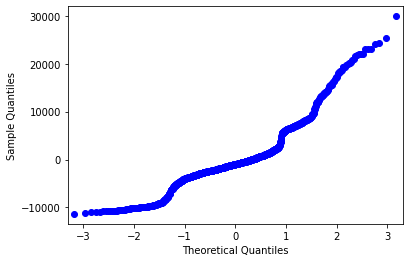

In [22]:
## qq plot to check normality
sm.qqplot(model_v1.resid)
plt.show()

In [23]:
# run JB test and find with normality assumption
test_results = sms.jarque_bera(model_v1.resid)
print("P-value of Jarque-Bera test is : ", round(test_results[1],5), ", so we reject the null-hypothesis, the normality assumption is violated.")

P-value of Jarque-Bera test is :  0.0 , so we reject the null-hypothesis, the normality assumption is violated.


The influential points were removed and residual vs fitted value and QQ-plot were plotted again

In [24]:
## remove influential points and check assumptions
df_filter = df[~(atyp_cook & atyp_stud)]
model_filter = smf.ols('charges~age+bmi+children+smoker+region' , df_filter).fit()
model_filter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     916.9
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        03:52:13   Log-Likelihood:                -12613.
No. Observations:                1278   AIC:                         2.524e+04
Df Residuals:                    1270   BIC:                         2.528e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.295e+04    776.462    -16.678      0.000   -1.45e+04   -1.14e+04
smoker[T.yes]        2.394e+04    325.463     73.564      0.000    2.33e+04    2.46e+04
region[T.northwest]  -623.9327    378.358     -1.649      0.099   -1366.208     118.343
region[T.southeast] -1056.8576    379.931     -2.782      0.005   -1802.219    -311.496
region[T.southwest]  -771.7596    377.403     -2.045      0.041   -1512.161     -31.358
age                   253.5373      9.453     26.820      0.000     234.992     272.083
bmi                   349.3809     22.641     15.431      0.000     304.963     393.799
children              411.7540    108.780      3.785      0.000     198.346     625.162
==============================================================================
Omnibus:                       25.049   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.661
Skew:                           0.269   Prob(JB):                     3.62e-07
Kurtosis:                       3.517   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

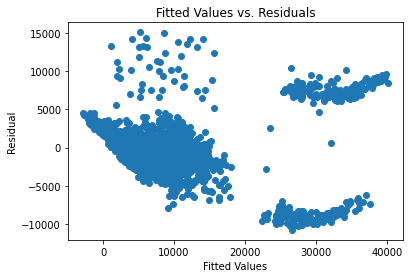

In [25]:
p = model_filter.fittedvalues
res = model_filter.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
plt.show()

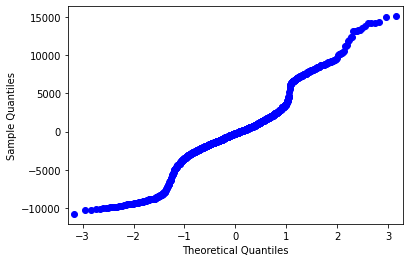

In [26]:
sm.qqplot(model_filter.resid)
plt.show()

In [27]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model_filter.resid, model_filter.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 593.6365742338363, 'LM-Test p-value': 5.711723342509972e-124}


In [28]:
# run JB test and find problem with heteroscedasticity
test_results = sms.jarque_bera(model_filter.resid)
print("P-value of Jarque-Bera test is : ", round(test_results[1],5), ", so we reject the null-hypothesis, the normality assumption is violated.")

P-value of Jarque-Bera test is :  0.0 , so we reject the null-hypothesis, the normality assumption is violated.


Transformations for Non-normality and Heteroskedasticity

In [29]:
# BOXCOX transformation
a,b = stats.boxcox(df["charges"])
df["boxcox_charges"] = a
model_boxcox = smf.ols('boxcox_charges~age+bmi+children+smoker+region' , df).fit()
model_boxcox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         boxcox_charges   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     634.0
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        03:52:26   Log-Likelihood:                -1334.5
No. Observations:                1338   AIC:                             2685.
Df Residuals:                    1330   BIC:                             2727.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.0853      0.106     76.084      0.000       7.877       8.294
smoker[T.yes]           2.3331      0.045     52.175      0.000       2.245       2.421
region[T.northwest]    -0.0922      0.052     -1.783      0.075      -0.194       0.009
region[T.southeast]    -0.2272      0.052     -4.373      0.000      -0.329      -0.125
region[T.southwest]    -0.1875      0.052     -3.615      0.000      -0.289      -0.086
age                     0.0506      0.001     39.198      0.000       0.048       0.053
bmi                     0.0203      0.003      6.534      0.000       0.014       0.026
children                0.1452      0.015      9.709      0.000       0.116       0.175
==============================================================================
Omnibus:                      472.596   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1713.328
Skew:                           1.712   Prob(JB):                         0.00
Kurtosis:                       7.360   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

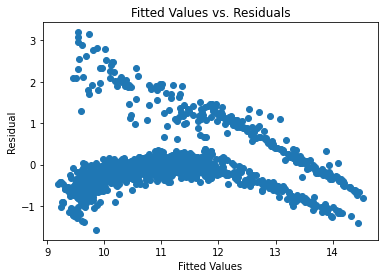

In [30]:
p = model_boxcox.fittedvalues
res = model_boxcox.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
plt.show()

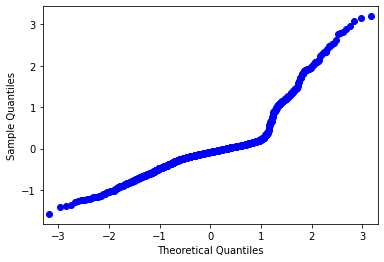

In [31]:
sm.qqplot(model_boxcox.resid)
plt.show()

In [32]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model_boxcox.resid, model_boxcox.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

# run JB test and find problem with heteroscedasticity
test_results = sms.jarque_bera(model_boxcox.resid)
print("P-value of Jarque-Bera test is : ", round(test_results[1],5), ", so we reject the null-hypothesis, the normality assumption is violated.")

{'LM Statistic': 71.17034008821032, 'LM-Test p-value': 8.567555116522945e-13}
P-value of Jarque-Bera test is :  0.0 , so we reject the null-hypothesis, the normality assumption is violated.


In [33]:
## Log transformation on response
df["log_charges"] = np.log(df["charges"])
model_ln = smf.ols('log_charges~age+bmi+children+smoker+region' , df).fit()
model_ln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_charges   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     622.9
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        03:52:38   Log-Likelihood:                -813.31
No. Observations:                1338   AIC:                             1643.
Df Residuals:                    1330   BIC:                             1684.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.0008      0.072     97.254      0.000       6.860       7.142
smoker[T.yes]           1.5473      0.030     51.081      0.000       1.488       1.607
region[T.northwest]    -0.0633      0.035     -1.809      0.071      -0.132       0.005
region[T.southeast]    -0.1568      0.035     -4.456      0.000      -0.226      -0.088
region[T.southwest]    -0.1286      0.035     -3.659      0.000      -0.197      -0.060
age                     0.0346      0.001     39.618      0.000       0.033       0.036
bmi                     0.0131      0.002      6.223      0.000       0.009       0.017
children                0.1013      0.010     10.002      0.000       0.081       0.121
==============================================================================
Omnibus:                      453.850   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1613.377
Skew:                           1.645   Prob(JB):                         0.00
Kurtosis:                       7.257   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

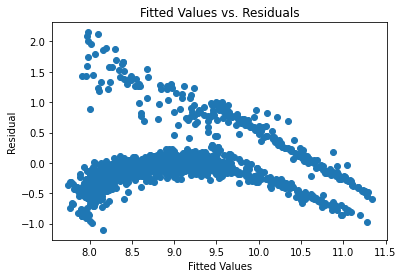

In [34]:
p = model_ln.fittedvalues
res = model_ln.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
plt.show()

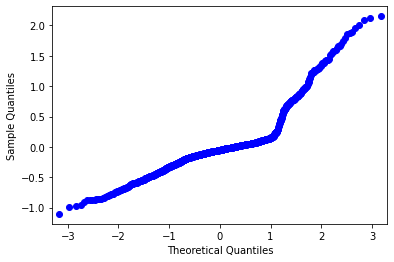

In [35]:
sm.qqplot(model_ln.resid)
plt.show()

In [36]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model_ln.resid, model_ln.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

# run JB test and find problem with heteroscedasticity
test_results = sms.jarque_bera(model_ln.resid)
print("P-value of Jarque-Bera test is : ", round(test_results[1],5), ", so we reject the null-hypothesis, the normality assumption is violated.")

{'LM Statistic': 78.99550533215312, 'LM-Test p-value': 2.2072184567875907e-14}
P-value of Jarque-Bera test is :  0.0 , so we reject the null-hypothesis, the normality assumption is violated.


Residual plots of the model show clear clustering of data points even with the log transformation. Due to this clustering, the fitted values and residuals also do not appear to be defined by any sort of functional relationship.
Then further performed the Jarque-Bera test for this log transformed model at 95% significance level. Which gave a p-value close to zero, suggesting a serious violation of the normalcy model assumption even in this case.

### Model Selection

I continue to fit the model with box cox transformation on the response with the different combinations of the predictors and deduced plausible final models as listed in the below table.

In [37]:
 #Model selection with boxcox
from itertools import combinations
y = 'boxcox_charges'
possible_variable = ['age','bmi','children','smoker', 'region']
possible_model =[]

for i in range(1,len(possible_variable)+ 1):
    for variable in combinations(possible_variable,i):
        possible_model.append(f"{y} ~ {' + '.join(variable)}")
#Calculate model selection matrix based on adjusted R-sqaured and mallow's Cp
# print(possible_model)
num_predictor =[]
adj_r_sqaure = []
mallow_cp = []
aic = []
bic = []
model_full =  model_boxcox
mse_full = model_full.mse_resid
n = model_full.nobs
for model in possible_model:
    model_fit = smf.ols(model, df).fit()
    adj_r_sqaure.append(round(model_fit.rsquared_adj,4))
    pred=model_fit.df_model+1
    num_predictor.append(pred)
    mallow_cp.append(round(model_fit.mse_resid*(n-(pred))/mse_full-(n-2*(pred)),4))
    aic.append(model_fit.aic)
    bic.append(model_fit.bic)
df_model_fit=pd.DataFrame(list(zip(possible_model, num_predictor, adj_r_sqaure, mallow_cp, aic, bic)),
                           columns = ['model' , 'number of predictor' , 'adj-R^2 ','Mallow\'s Cp' , 'AIC' , 'BIC'])
df_model_fit

,model,number of predictor,adj-R^2,Mallow's Cp,AIC,BIC
0,boxcox_charges ~ age,2.0,0.2684,2882.3328,4216.691445,4227.089308
1,boxcox_charges ~ bmi,2.0,0.0177,4327.4752,4611.025124,4621.422987
2,boxcox_charges ~ children,2.0,0.0237,4292.9073,4602.830514,4613.228377
3,boxcox_charges ~ smoker,2.0,0.4561,1800.7170,3820.072325,3830.470188
4,boxcox_charges ~ region,4.0,0.0009,4419.4904,4635.666084,4656.461809
5,boxcox_charges ~ age + bmi,3.0,0.2742,2847.7908,4207.044761,4222.641555
6,boxcox_charges ~ age + children,3.0,0.2860,2780.1389,4185.211420,4200.808213
7,boxcox_charges ~ age + smoker,3.0,0.7431,147.3980,2817.363224,2832.960018
8,boxcox_charges ~ age + region,5.0,0.2704,2867.3465,4216.015086,4242.009742
9,boxcox_charges ~ bmi + children,3.0,0.0409,4191.6354,4580.045741,4595.642534


In [38]:
for i in set(df_model_fit['number of predictor']):
    display(df_model_fit[df_model_fit['number of predictor']==i])

,model,number of predictor,adj-R^2,Mallow's Cp,AIC,BIC
0,boxcox_charges ~ age,2.0,0.2684,2882.3328,4216.691445,4227.089308
1,boxcox_charges ~ bmi,2.0,0.0177,4327.4752,4611.025124,4621.422987
2,boxcox_charges ~ children,2.0,0.0237,4292.9073,4602.830514,4613.228377
3,boxcox_charges ~ smoker,2.0,0.4561,1800.7170,3820.072325,3830.470188


,model,number of predictor,adj-R^2,Mallow's Cp,AIC,BIC
5,boxcox_charges ~ age + bmi,3.0,0.2742,2847.7908,4207.044761,4222.641555
6,boxcox_charges ~ age + children,3.0,0.2860,2780.1389,4185.211420,4200.808213
7,boxcox_charges ~ age + smoker,3.0,0.7431,147.3980,2817.363224,2832.960018
9,boxcox_charges ~ bmi + children,3.0,0.0409,4191.6354,4580.045741,4595.642534
10,boxcox_charges ~ bmi + smoker,3.0,0.4735,1700.2917,3777.623653,3793.220447
12,boxcox_charges ~ children + smoker,3.0,0.4786,1670.9783,3764.626196,3780.222989


,model,number of predictor,adj-R^2,Mallow's Cp,AIC,BIC
4,boxcox_charges ~ region,4.0,0.0009,4419.4904,4635.666084,4656.461809
15,boxcox_charges ~ age + bmi + children,4.0,0.2916,2746.5964,4175.596392,4196.392117
16,boxcox_charges ~ age + bmi + smoker,4.0,0.7486,116.8653,2789.611653,2810.407378
18,boxcox_charges ~ age + children + smoker,4.0,0.7595,54.3287,2730.493397,2751.289122
21,boxcox_charges ~ bmi + children + smoker,4.0,0.4955,1573.4731,3721.539717,3742.335442


,model,number of predictor,adj-R^2,Mallow's Cp,AIC,BIC
8,boxcox_charges ~ age + region,5.0,0.2704,2867.3465,4216.015086,4242.009742
11,boxcox_charges ~ bmi + region,5.0,0.0199,4308.3391,4611.071377,4637.066033
13,boxcox_charges ~ children + region,5.0,0.0254,4276.5333,4603.499687,4629.494344
14,boxcox_charges ~ smoker + region,5.0,0.4569,1795.3252,3821.201063,3847.195719
25,boxcox_charges ~ age + bmi + children + smoker,5.0,0.7648,24.6907,2701.559302,2727.553958


,model,number of predictor,adj-R^2,Mallow's Cp,AIC,BIC
17,boxcox_charges ~ age + bmi + region,6.0,0.2763,2832.4002,4206.179807,4237.373394
19,boxcox_charges ~ age + children + region,6.0,0.2887,2761.4859,4183.165714,4214.359302
20,boxcox_charges ~ age + smoker + region,6.0,0.7444,142.7090,2813.660775,2844.854362
22,boxcox_charges ~ bmi + children + region,6.0,0.0436,4169.9944,4579.333417,4610.527004
23,boxcox_charges ~ bmi + smoker + region,6.0,0.4789,1668.3495,3766.776034,3797.969622
24,boxcox_charges ~ children + smoker + region,6.0,0.4795,1664.6854,3765.137743,3796.331331


,model,number of predictor,adj-R^2,Mallow's Cp,AIC,BIC
26,boxcox_charges ~ age + bmi + children + region,7.0,0.2943,2728.2204,4173.571812,4209.964331
27,boxcox_charges ~ age + bmi + smoker + region,7.0,0.7520,100.2572,2774.539559,2810.932078
28,boxcox_charges ~ age + children + smoker + region,7.0,0.7609,48.6942,2725.200777,2761.593296
29,boxcox_charges ~ bmi + children + smoker + region,7.0,0.5008,1542.4577,3710.372330,3746.764849


,model,number of predictor,adj-R^2,Mallow's Cp,AIC,BIC
30,boxcox_charges ~ age + bmi + children + smoker...,8.0,0.7682,8.0,2684.924699,2726.516149


In [39]:
# candidate selection
df_model_candidates_low_mallows = df_model_fit[df_model_fit["Mallow's Cp"]<=100]
df_model_candidates_low_mallows

,model,number of predictor,adj-R^2,Mallow's Cp,AIC,BIC
18,boxcox_charges ~ age + children + smoker,4.0,0.7595,54.3287,2730.493397,2751.289122
25,boxcox_charges ~ age + bmi + children + smoker,5.0,0.7648,24.6907,2701.559302,2727.553958
28,boxcox_charges ~ age + children + smoker + region,7.0,0.7609,48.6942,2725.200777,2761.593296
30,boxcox_charges ~ age + bmi + children + smoker...,8.0,0.7682,8.0000,2684.924699,2726.516149


In [40]:
df_model_candidates = df_model_fit[abs(df_model_fit['number of predictor']-df_model_fit["Mallow's Cp"])<=df_model_fit["number of predictor"]]
df_model_candidates

,model,number of predictor,adj-R^2,Mallow's Cp,AIC,BIC
30,boxcox_charges ~ age + bmi + children + smoker...,8.0,0.7682,8.0,2684.924699,2726.516149


In [41]:
selected_model = smf.ols(df_model_candidates_low_mallows.iloc[1,0],df).fit()
selected_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.765    
Dependent Variable: boxcox_charges   AIC:                2701.5593
Date:               2022-10-15 03:53 BIC:                2727.5540
No. Observations:   1338             Log-Likelihood:     -1345.8  
Df Model:           4                F-statistic:        1088.    
Df Residuals:       1333             Prob (F-statistic): 0.00     
R-squared:          0.765            Scale:              0.43933  
-------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept         8.0586    0.1029  78.3163  0.0000  7.8568  8.2605
smoker[T.yes]     2.3273    0.0449  51.8098  0.0000  2.2392  2.4154
age               0.0508    0.0013  39.0923  0.0000  0.0483  0.0534
bmi               0.0167    0.0030   5.5837  0.0000  0.0108  0.0226
children          0.1450    0.0151   9.6335  0.0000  0.1155  0.1745
------------------------------------------------------------------
Omnibus:              462.021      Durbin-Watson:         2.058   
Prob(Omnibus):        0.000        Jarque-Bera (JB):      1651.792
Skew:                 1.675        Prob(JB):              0.000   
Kurtosis:             7.290        Condition No.:         292     
==================================================================

"""

In [43]:
selected_model.get_robustcov_results(cov_type = 'HC0').summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,8.058626,0.100148,80.467135,0.000000e+00,7.862161,8.255091
smoker[T.yes],2.327292,0.047452,49.044893,8.692081e-301,2.234203,2.420381
age,0.050801,0.001499,33.896778,3.725673e-182,0.047861,0.053741
bmi,0.016699,0.003057,5.461773,5.617624e-08,0.010701,0.022696
children,0.145001,0.013701,10.583563,3.435339e-25,0.118124,0.171878


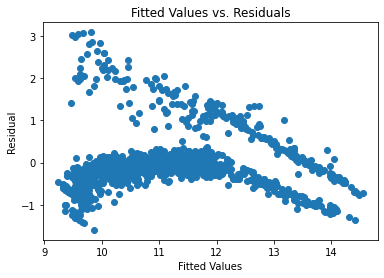

In [ ]:
p = selected_model.fittedvalues
res = selected_model.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
plt.show()

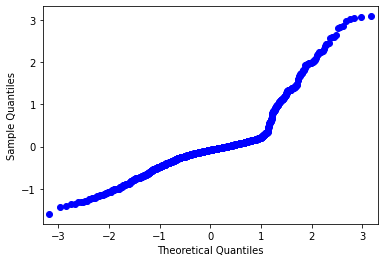

In [ ]:
sm.qqplot(selected_model.resid)
plt.show()

In [ ]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(selected_model.resid, selected_model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

# run JB test and find problem with heteroscedasticity
test_results = sms.jarque_bera(selected_model.resid)
print("P-value of Jarque-Bera test is : ", round(test_results[1],5), ", so we reject the null-hypothesis, the normality assumption is violated.")

{'LM Statistic': 72.64616353805621, 'LM-Test p-value': 6.267055175451873e-15}
P-value of Jarque-Bera test is :  0.0 , so we reject the null-hypothesis, the normality assumption is violated.


### Potential Problem:
As the diagnostics above suggested, the model came with problems of heteroscedasticity and non-normally distributed residuals. These problems didn’t seem to be fixed by the transformations we tried.
While there are severe violations on the normal distribution of residual and also violations of a linear relationship between our predictor and response variable we needn't worry as our sample size is sufficiently large.

For the problem of heteroscedasticity, ran the t-test on each coefficient using robust standard errors. The results above suggested that all of the coefficients were still significant and didn't deviate much from the original model, so I could still use the statistical inference from the model even though it came with the problem of heteroscedasticity.

### Conclusion

After studying the dataset from the internet, which included information on patients' insurance cost, built a linear model and found from that model that the significant contributors to predict the insurance charges were whether the patient is a smoker or non-smoker, age of primary beneficiary, bmi and number of children covered by health insurance.
It is worth mentioning that even using robust standard errors, the extreme heteroscedasticity could still be affecting the t-test p-values. The extreme heteroscedasticity could be because the observations seem to be from different original populations as indicated by the clustering in the residual plots.